# Energy Efficiency Classification Analysis


Importing Libraries and Reading our Data

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("energy_efficiency_data.csv")

In [3]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28



Its a classification problem so we need to change our target variables from nominal values to classes. The classes will be Low = 0, Medium = 1, High = 2. We do that by splitting our data into three Bins in the following way: 0%-33%,33%-66%,66%-100%

In [4]:
df['Heating_Load'].describe()

count    768.000000
mean      22.307201
std       10.090196
min        6.010000
25%       12.992500
50%       18.950000
75%       31.667500
max       43.100000
Name: Heating_Load, dtype: float64

In [5]:
heat_bins = [0, 15, 24.5, 43.1]

In [6]:

df['Cooling_Load'].describe()
cool_bins = [0,18.5,27.5,48.03]

In [7]:
temp_labels = [0, 1, 2]
df['HeatClass'] = pd.cut(df['Heating_Load'], bins=heat_bins, labels=temp_labels)
df['CoolClass'] = pd.cut(df['Cooling_Load'], bins=cool_bins, labels=temp_labels)

In [8]:

df.head()


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,HeatClass,CoolClass
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,1,1
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,1,1
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,1,1
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,1,1
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,1,2



EDA

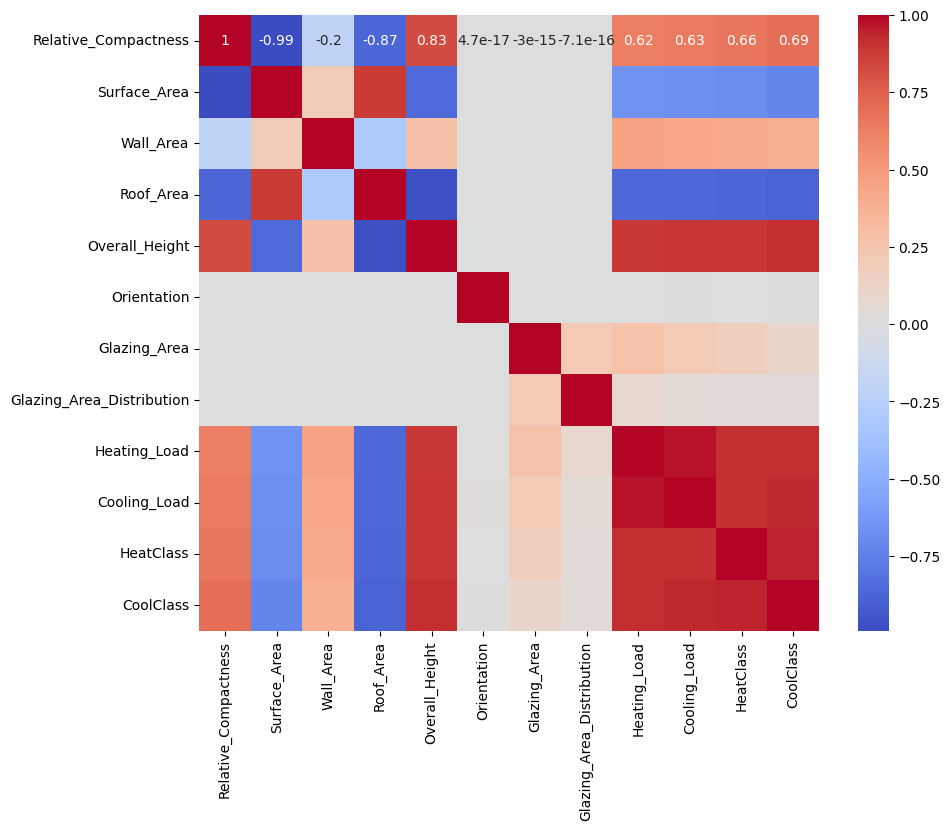

In [9]:

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax = ax)
plt.show()



We see that one of the features with the biggest correlations to the heating and cooling classes of our data is the overall height of the structures.

We will now Scale and Split our Data so it is suitable for feeding into our Models

In [10]:
x = df.drop(columns=['Heating_Load','Cooling_Load','HeatClass','CoolClass'])
yh= df['HeatClass']
yc = df['CoolClass']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(x)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, yh_train, yh_test = train_test_split(x, yh, test_size=0.25, random_state=42)
X_train, X_test, yc_train, yc_test = train_test_split(x, yc, test_size=0.25, random_state=42)


Desicion Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier
DT_classifer = DecisionTreeClassifier()
DT_classifer.fit(X_train, yh_train)
DT_y_pred = DT_classifer.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {:0.2%}'. format(accuracy_score(yh_test, DT_y_pred)))

Model accuracy score with criterion entropy: 98.96%


Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, yh_train)
rf_y_pred = rf_classifier.predict(X_test)
print('Model accuracy score with criterion entropy: {:0.2%}'. format(accuracy_score(yh_test, rf_y_pred)))

Model accuracy score with criterion entropy: 98.96%


In [14]:
# Add model comparison
from sklearn.metrics import classification_report, confusion_matrix


In [15]:
# For Heating Load
print("=== Heating Load Classification Report ===")
print(classification_report(yh_test, rf_y_pred))

=== Heating Load Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.97      0.97      0.97        38
           2       0.99      1.00      0.99        87

    accuracy                           0.99       192
   macro avg       0.99      0.99      0.99       192
weighted avg       0.99      0.99      0.99       192



In [16]:
# For Cooling Load  
rf_cool_pred = rf_classifier.predict(X_test)  # You should train separately for cooling
print("=== Cooling Load Classification Report ===")
print(classification_report(yc_test, rf_cool_pred))

=== Cooling Load Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        73
           1       0.74      0.90      0.81        31
           2       0.97      0.97      0.97        88

    accuracy                           0.93       192
   macro avg       0.90      0.92      0.91       192
weighted avg       0.94      0.93      0.93       192



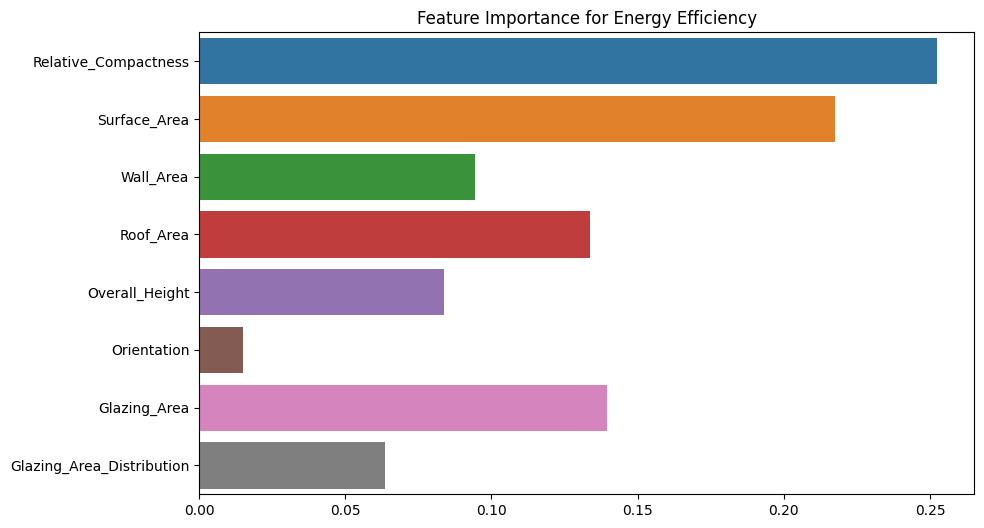

In [17]:
# Feature importance visualization
importances = rf_classifier.feature_importances_
feature_names = x.columns
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance for Energy Efficiency")
plt.show()